<a href="https://colab.research.google.com/github/ahrarbinaslam/pytorch-tutorial/blob/main/Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

Classification is the task of predicting which of a set of classes an example belongs to. Suppose you have pictures of a dog, cat, and a horse. You train the model and show it the picture of a dog, the model should classify it as a dog (i.e. one of the classes).

There are two types of classification:

1.   Binary Classification
2.   Multiclass Classification

**Binary Classification:**: Classifying objects into one of two classes is called binary classification.

**Multiclass Classification:** Classifying objects into one of three or more classes is called multiclass classification.

## Importing the necessary libraries

In [2]:
import sklearn
from sklearn.datasets import make_circles
import torch
import pandas as pd
from matplotlib import pyplot as plt

## Using the make_circles dataset

In [3]:
n_samples=1000
X , y=make_circles(n_samples, noise=0.03, random_state=42) #Random_state is similar to torch.manual_seed()

print(f"Printing the first five samples of X: {X[:5]}")
print(f"Printing the first five samples of y: {y[:5]}")

Printing the first five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Printing the first five samples of y: [1 1 1 1 0]


## Converting our features and labels into a Pandas DataFrame

In [4]:
new_dataframe=pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "Y":y})
new_dataframe

,X1,X2,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


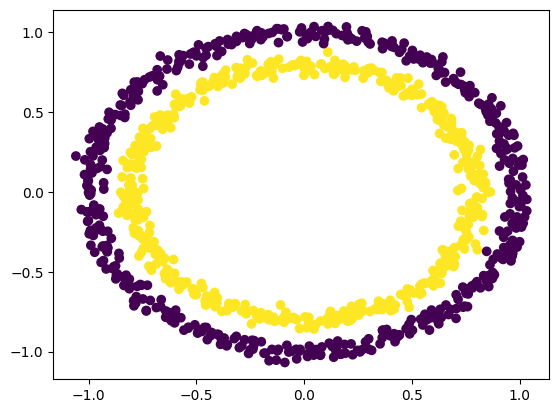

In [5]:
# To visualize the data, we are using matplotlib

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.viridis)
plt.show()

In [6]:
# Converting the data into tensors

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

print(f"Printing the first five samples of X Tensor: {X[:5]}")
print(f"Printing the first five samples of y tensor: {y[:5]}")

Printing the first five samples of X Tensor: tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])
Printing the first five samples of y tensor: tensor([1., 1., 1., 1., 0.])


In [7]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
len(X_train), len(X_test)

(800, 200)

In [10]:
len(y_train), len(y_test)

(800, 200)

In [11]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Creating a classification class to create layers of our neural network

In [12]:
class CircleClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=5)
    self.layer2=nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

model=CircleClassification().to(device)
model

CircleClassification(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
# There is also an easier method to implement the same Neural Network

model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4240,  0.4349],
                      [-0.5060,  0.4926],
                      [-0.5970,  0.3489],
                      [ 0.4945,  0.6551],
                      [-0.4388, -0.3380]])),
             ('0.bias', tensor([-0.1531,  0.3151,  0.1994,  0.4617,  0.5174])),
             ('1.weight',
              tensor([[-0.2549,  0.0863, -0.1425,  0.2903, -0.1198]])),
             ('1.bias', tensor([-0.0498]))])

##### You can play with neural networks with different layers, inputs, activation functions, learning rates, etc on : https://playground.tensorflow.org/

In [15]:
with torch.inference_mode():
  y_predicted = model_0(X_test.to(device))

print(f"The length of the predictions are: {len(y_predicted)} and Shape: {y_predicted.shape}")
print(f"The length of the actual labels are: {len(y_test)} and Shape: {y_test.shape}")
print(f"The first 10 predictions are: {y_predicted[:10]}")
print(f"The first 10 labels are: {y_test[:10]}")

The length of the predictions are: 200 and Shape: torch.Size([200, 1])
The length of the actual labels are: 200 and Shape: torch.Size([200])
The first 10 predictions are: tensor([[ 0.0884],
        [ 0.1702],
        [-0.0663],
        [ 0.1320],
        [ 0.0284],
        [ 0.0776],
        [ 0.2328],
        [ 0.2114],
        [-0.0701],
        [ 0.1767]])
The first 10 labels are: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [16]:
# Creating a loss function
loss_fn= nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer= torch.optim.SGD(model_0.parameters(), lr=0.01)

In [17]:
def accuracy(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc= correct/(len(y_pred)) * 100
  return acc

## Training and Testing Loop

1. Do the Forward Pass
2. Calculate the Training Loss
3. Zero the Grad
4. Loss Backward (Backpropagation)
5. Optimizer Step (Gradient Descent)
6. Make Predictions
7. Calculate the Testing Loss
8. Calculate the Accuracy

In [21]:
# Before creating a training loop, lets see what our y_predicted looks like right now
print(f"The first five values of y_predicted are: {y_predicted[:5]}")

The first five values of y_predicted are: tensor([[ 0.0884],
        [ 0.1702],
        [-0.0663],
        [ 0.1320],
        [ 0.0284]])


In [23]:
# We can see that these are random values, where as we need our model to classify the objects, like 0 or 1.
# So we need to pass the y_predicted to an activation function, for simplicity, lets just use Sigmoid for now.
y_prob = torch.sigmoid(y_predicted)
print(f"The probabilities of the labels are : {y_prob[:5]}")

The probabilities of the labels are : tensor([[0.5221],
        [0.5424],
        [0.4834],
        [0.5329],
        [0.5071]])


In [24]:
# Lets us pass it through the round function to round them to either 0 or 1.

y_prob_round = torch.round(y_prob)
y_prob_round[:5]

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]])

In [31]:
torch.manual_seed(42)
epochs = 500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_preds = model_0(X_train).squeeze()
  y_preds_value = torch.round(torch.sigmoid(y_preds))

  training_loss=loss_fn(y_preds, y_train)
  training_acc = accuracy(y_true=y_train, y_pred=y_preds_value)

  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test).squeeze()
    test_pred_value = torch.round(torch.sigmoid(test_pred))

    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred_value)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {training_loss:.5f}, Accuracy: {training_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69373, Accuracy: 52.25% | Test loss: 0.69806, Test acc: 47.00%
Epoch: 10 | Loss: 0.69370, Accuracy: 52.12% | Test loss: 0.69798, Test acc: 47.00%
Epoch: 20 | Loss: 0.69367, Accuracy: 52.12% | Test loss: 0.69791, Test acc: 47.00%
Epoch: 30 | Loss: 0.69364, Accuracy: 52.12% | Test loss: 0.69784, Test acc: 47.00%
Epoch: 40 | Loss: 0.69362, Accuracy: 52.12% | Test loss: 0.69777, Test acc: 46.50%
Epoch: 50 | Loss: 0.69360, Accuracy: 52.00% | Test loss: 0.69770, Test acc: 46.50%
Epoch: 60 | Loss: 0.69357, Accuracy: 51.88% | Test loss: 0.69764, Test acc: 46.50%
Epoch: 70 | Loss: 0.69355, Accuracy: 51.88% | Test loss: 0.69757, Test acc: 47.00%
Epoch: 80 | Loss: 0.69353, Accuracy: 51.62% | Test loss: 0.69751, Test acc: 47.00%
Epoch: 90 | Loss: 0.69351, Accuracy: 51.50% | Test loss: 0.69745, Test acc: 47.00%
Epoch: 100 | Loss: 0.69349, Accuracy: 51.62% | Test loss: 0.69739, Test acc: 47.00%
Epoch: 110 | Loss: 0.69347, Accuracy: 51.62% | Test loss: 0.69734, Test acc: 47.00%
Epo

## Our model is perfoming very badly, so we need to inspect what is going wrong.

In [34]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

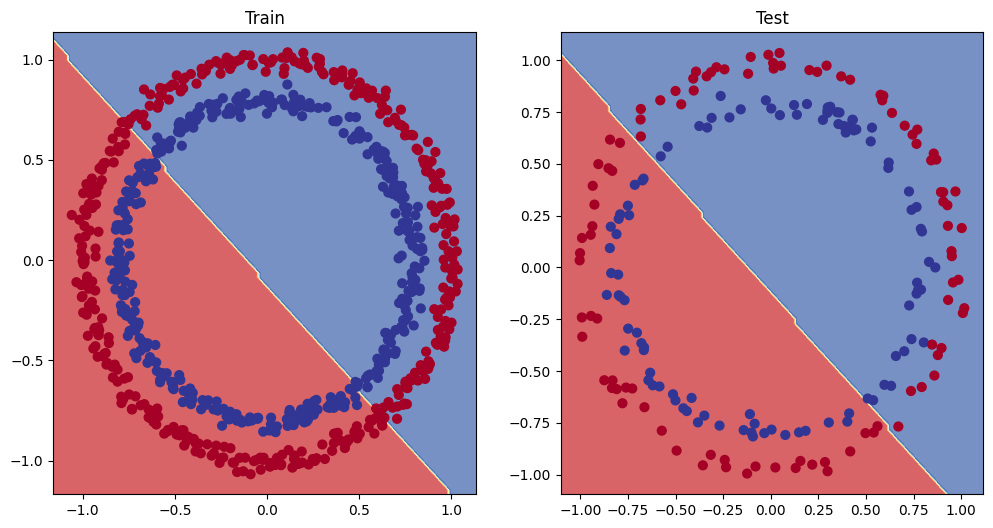

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## To improve a model, there are various things one can do:


1.   Add more layers
2.   Add more hidden units
3.   Fitting for longer (more epochs)
4.   Changing the activation functions
5.   Change the learning rate
6.   Change the loss function


In [57]:
# So, here is the update that we have made:

# 1. Increased number of layers: Three fully connected layers (Linear layers).
# 2. Increased number of output features in the hidden layers: Both hidden layers have 10 neurons.
# 3. Introduced ReLU (Rectified Linear Unit) activation function to introduce non-linearity, improving the model's ability to learn complex patterns.

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):

       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModelV2().to(device)
print(model_1)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [58]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [59]:
torch.manual_seed(42)
epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_preds = model_1(X_train).squeeze()
  y_preds_value = torch.round(torch.sigmoid(y_preds))

  training_loss=loss_fn(y_preds, y_train)
  training_acc = accuracy(y_true=y_train, y_pred=y_preds_value)

  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test).squeeze()
    test_pred_value = torch.round(torch.sigmoid(test_pred))

    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred_value)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {training_loss:.5f}, Accuracy: {training_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 10 | Loss: 0.69248, Accuracy: 50.50% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 20 | Loss: 0.69225, Accuracy: 59.13% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 30 | Loss: 0.69209, Accuracy: 70.25% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 40 | Loss: 0.69195, Accuracy: 68.38% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 50 | Loss: 0.69181, Accuracy: 58.25% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 60 | Loss: 0.69168, Accuracy: 54.00% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 70 | Loss: 0.69155, Accuracy: 53.12% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 80 | Loss: 0.69141, Accuracy: 52.62% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 90 | Loss: 0.69128, Accuracy: 52.75% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69594, Test acc: 47.50%
Epoch: 110 | Loss: 0.69103, Accuracy: 52.88% | Test loss: 0.69594, Test acc: 47.50%
Epo

In [65]:
# Predicting labels with our model

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()

print(y_preds[:10])
print(y_test[:10])

print(f"Comparing our first 10 labels: {torch.eq(y_preds[:10], y_test[:10])}")



tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
Comparing our first 10 labels: tensor([True, True, True, True, True, True, True, True, True, True])


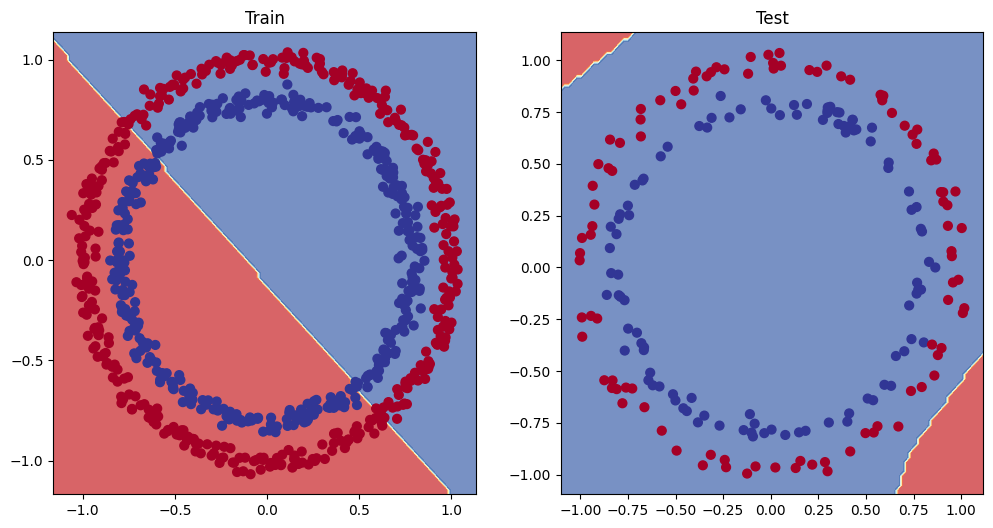

In [51]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_0 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) # model_3 = has non-linearity